In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

import pickle

In [3]:
df = pd.read_csv("../datas/clean_data/clean_dataset.csv")

In [4]:
df.head()

,clean_text,sentiment
0,one reviewer mentioned watching oz episode you...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there family little boy jake think t...,negative
4,petter matteis love time money visually stunni...,positive


In [7]:
x = df["clean_text"]
y = df["sentiment"]

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=42)

In [9]:
tfid_vec = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)
x_train_tfid_vec = tfid_vec.fit_transform(xtrain)
x_test_tfid_vec = tfid_vec.transform(xtest)

print(x_train_tfid_vec.shape)
print(x_test_tfid_vec.shape)

(40000, 5000)
(10000, 5000)


In [11]:
lb = LabelEncoder()

y_train_lb = lb.fit_transform(ytrain)
y_test_lb = lb.transform(ytest)


In [24]:
models = {
    "logestic_regression": LogisticRegression(),
    "multinomial_nb": MultinomialNB(),
    "linear_svc": LinearSVC()
}

In [25]:
for model_name,model in models.items():
    print(f"model name is: {model_name}")

    train_model = model.fit(x_train_tfid_vec,y_train_lb)
    print(f"train score is: {train_model.score(x_train_tfid_vec,y_train_lb)}")
    print(f"test score is: {train_model.score(x_test_tfid_vec,y_test_lb)}")

    pred_y = model.predict(x_test_tfid_vec)

    cm = confusion_matrix(pred_y,y_test_lb)
    print(f"confusion_matrix is: {cm}")
    acc_score = accuracy_score(pred_y,y_test_lb)
    print(f"accuracy_score is: {acc_score}")
    print("<------------>")

model name is: logestic_regression
train score is: 0.9113
test score is: 0.8883
confusion_matrix is: [[4339  495]
 [ 622 4544]]
accuracy_score is: 0.8883
<------------>
model name is: multinomial_nb
train score is: 0.866875
test score is: 0.8557
confusion_matrix is: [[4176  658]
 [ 785 4381]]
accuracy_score is: 0.8557
<------------>
model name is: linear_svc
train score is: 0.93015
test score is: 0.8819
confusion_matrix is: [[4334  554]
 [ 627 4485]]
accuracy_score is: 0.8819
<------------>


In [27]:
logestic_reg = LogisticRegression(max_iter=1000)
log_model = logestic_reg.fit(x_train_tfid_vec,y_train_lb)

train_score = log_model.score(x_train_tfid_vec,y_train_lb)
print(f"train score is: {train_score}")
test_score = log_model.score(x_test_tfid_vec,y_test_lb)
print(f"test score is: {test_score}")

train score is: 0.9113
test score is: 0.8883


In [28]:
y_pred = log_model.predict(x_test_tfid_vec)
y_pred

array([0, 1, 0, ..., 1, 0, 1], shape=(10000,))

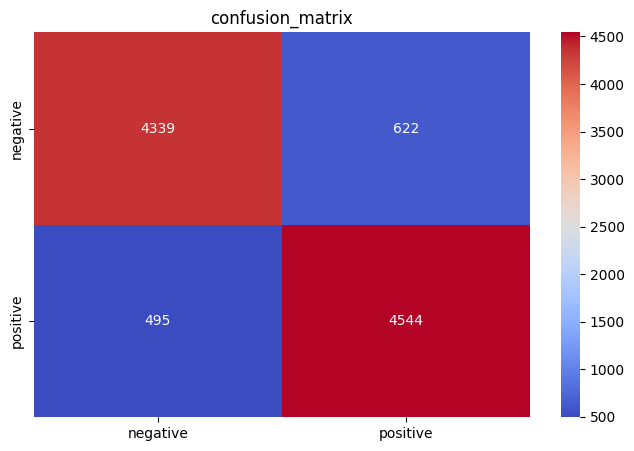

In [38]:
log_cm = confusion_matrix(y_test_lb,y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(
    log_cm,
    annot=True,
    fmt="d",
    cmap='coolwarm',
    xticklabels = ["negative","positive"],
    yticklabels = ["negative","positive"]
)
plt.title("confusion_matrix")
plt.show()